In [149]:
from sklearn.cluster import KMeans
import numpy as np
import math
from BeautifulSoup import BeautifulSoup
import urllib2
import re
from collections import defaultdict
from collections import deque
import itertools
import collections
import copy
import random
from collections import deque
import matplotlib.pyplot as plt
import matplotlib
import pylab
import types
import time
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

# Data

In [3]:
# Returns a list of ingredients in a recipe link
def get_ingredients(link):
    html_page = urllib2.urlopen(link)
    soup = BeautifulSoup(html_page)
    recipes = {}
    for link in soup.findAll('span', attrs={'class': "recipe-ingred_txt added"}):
        clean_text = clean_ingredient(link.text)
        ingredient = clean_text[1]
        measurement = clean_text[0]
        recipes[ingredient] = measurement
    return recipes

# Cleans an ingredient name        
def clean_ingredient(ingredient_name):
    name = ingredient_name
    # TODO: this does not include things 1 1/2 cups
    measurement = name[:name.index(" ")]
    print "name: ", name
    if "," in name:
        name = name[:name.index(",")]
    name = name.split()
    new_name_words = [word for word in name if word not in measurement_words and word not in numbers]
    ingredient = ""
    for word in new_name_words:
        # Clean out numbers 
        not_number = True
        not_measurement_word = True
        not_punctuation = True
        for num in numbers:
            if num in word:
                not_number = False
                
        for mword in measurement_words:
            if mword in word:
                not_measurement_word = False
                
        if not_number and not_measurement_word:
            ingredient += word + " "
    ingredient = ingredient[:-1]# Remove space at the end
    return measurement,ingredient 

measurement_words = ["F","C","degree","can","degrees","ounce","cloves","packages","clove","package","ounces","tablespoon","tablespoons","teaspoons","teaspoon","cup","pound","pounds","cups","cubes","drops"]
numbers = ["0","1","2","3","4","5","6","7","8","9"]


In [4]:
# Parse webdata
html_page = urllib2.urlopen("http://allrecipes.com/recipes/839/desserts/cookies/chocolate-chip-cookies/")
soup = BeautifulSoup(html_page)

# Go through links for each recipe
count = 0
recipes = []
for link in list(soup.findAll('a')):
#     if count == 4:
#         break
    name =  str(link.get('href'))
    if "recipe/" in name:
        first_index = name.index("/",1)+1
        last_index = name.index("/", first_index+1)
        recipe_number = name[first_index: last_index]
        if recipe_number[0].isdigit():
            new_link = "http://allrecipes.com/recipe/" + recipe_number
            recipe = get_ingredients(new_link)
            if count%2==0:
                recipes.append(recipe)
                print recipe
            count += 1


name:  1 cup butter, softened
name:  1 cup white sugar
name:  1 cup packed brown sugar
name:  2 eggs
name:  1 teaspoon vanilla extract
name:  2 cups all-purpose flour
name:  2 1/2 cups rolled oats
name:  1/2 teaspoon salt
name:  1 teaspoon baking powder
name:  1 teaspoon baking soda
name:  2 cups semisweet chocolate chips
name:  4 ounces milk chocolate, grated
name:  1 1/2 cups chopped walnuts
{u'butter': u'1', u'semisweet chocolate chips': u'2', u'packed brown sugar': u'1', u'vanilla extract': u'1', u'eggs': u'2', u'baking powder': u'1', u'chopped walnuts': u'1', u'all-purpose flour': u'2', u'white sugar': u'1', u'milk chocolate': u'4', u'salt': u'1/2', u'baking soda': u'1', u'rolled oats': u'2'}
name:  2 cups brown sugar
name:  1 cup white sugar
name:  2 cups butter, softened
name:  4 eggs
name:  2 tablespoons vanilla extract
name:  1 teaspoon baking soda
name:  1/2 teaspoon salt
name:  4 3/4 cups whole wheat flour
name:  1 cup ground pecans
name:  4 cups semisweet chocolate chips
na

name:  2 cups all-purpose flour
name:  1/2 teaspoon baking soda
name:  1/2 teaspoon salt
name:  3/4 cup unsalted butter, melted
name:  1 cup packed brown sugar
name:  1/2 cup white sugar
name:  1 tablespoon vanilla extract
name:  1 egg
name:  1 egg yolk
name:  2 cups semisweet chocolate chips
{u'semisweet chocolate chips': u'2', u'packed brown sugar': u'1', u'vanilla extract': u'1', u'egg': u'1', u'baking soda': u'1/2', u'all-purpose flour': u'2', u'white sugar': u'1/2', u'salt': u'1/2', u'egg yolk': u'1', u'unsalted butter': u'3/4'}
name:  2 cups all-purpose flour
name:  1/2 teaspoon baking soda
name:  1/2 teaspoon salt
name:  3/4 cup unsalted butter, melted
name:  1 cup packed brown sugar
name:  1/2 cup white sugar
name:  1 tablespoon vanilla extract
name:  1 egg
name:  1 egg yolk
name:  2 cups semisweet chocolate chips
name:  1 cup butter, softened
name:  1 cup white sugar
name:  1 cup packed brown sugar
name:  2 eggs
name:  2 teaspoons vanilla extract
name:  3 cups all-purpose flou

name:  1 cup butter flavored shortening
name:  3/4 cup white sugar
name:  3/4 cup brown sugar
name:  2 eggs
name:  2 teaspoons Mexican vanilla extract
name:  2 1/4 cups all-purpose flour
name:  1 teaspoon baking soda
name:  1 teaspoon salt
name:  2 cups milk chocolate chips
{u'milk chocolate chips': u'2', u'vanilla extract': u'2', u'salt': u'1', u'eggs': u'2', u'all-purpose flour': u'2', u'white sugar': u'3/4', u'butter flavored shortening': u'1', u'baking soda': u'1', u'brown sugar': u'3/4'}
name:  1 cup butter flavored shortening
name:  3/4 cup white sugar
name:  3/4 cup brown sugar
name:  2 eggs
name:  2 teaspoons Mexican vanilla extract
name:  2 1/4 cups all-purpose flour
name:  1 teaspoon baking soda
name:  1 teaspoon salt
name:  2 cups milk chocolate chips
name:  1 cup butter
name:  1/2 cup white sugar
name:  1 cup packed brown sugar
name:  1 teaspoon vanilla extract
name:  2 eggs
name:  2 1/2 cups all-purpose flour
name:  1 teaspoon baking soda
name:  1 teaspoon salt
name:  2 cu

name:  2 cups all-purpose flour
name:  1/2 cup cocoa powder
name:  1 teaspoon baking soda
name:  1 cup softened butter
name:  3/4 cup white sugar
name:  3/4 cup packed brown sugar
name:  2 eggs
name:  1 teaspoon vanilla extract
name:  2 cups semisweet chocolate chips
name:  1 cup unsalted butter
name:  1 cup white sugar
name:  3/4 cup packed brown sugar
name:  2 eggs
name:  1 1/4 cups unsweetened cocoa powder
name:  1 3/4 cups all-purpose flour
name:  2 teaspoons baking soda
name:  2 cups white chocolate chips
{u'white chocolate chips': u'2', u'packed brown sugar': u'3/4', u'eggs': u'2', u'unsweetened cocoa powder': u'1', u'all-purpose flour': u'1', u'white sugar': u'1', u'baking soda': u'2', u'unsalted butter': u'1'}
name:  1 cup unsalted butter
name:  1 cup white sugar
name:  3/4 cup packed brown sugar
name:  2 eggs
name:  1 1/4 cups unsweetened cocoa powder
name:  1 3/4 cups all-purpose flour
name:  2 teaspoons baking soda
name:  2 cups white chocolate chips


In [5]:
len(recipes)

30

In [7]:
# Compute the axes of the ingredient vector space
for recipe in recipes:
    for ingredient in recipe:
        ingredient_vector.append(ingredient)
ingredient_vector = list(set(ingredient_vector))
ingredient_vector.sort()
print ingredient_vector

[u'all-purpose flour', u'baking powder', u'baking soda', u'brown sugar', u'butter', u'butter flavored shortening', u'chocolate cake mix', u'chocolate chips', u'chocolate covered thin mints', u'chocolate-hazelnut spread', u'chopped', u'chopped (optional)', u'chopped and toasted walnuts', u'chopped semisweet chocolate', u'chopped toasted hazelnuts', u'chopped walnuts', u'chopped walnuts (optional)', u'cocoa powder', u'coconut', u"confectioners' sugar", u'egg', u'egg whites', u'egg yolk', u'eggs', u'ground cinnamon', u'hot water', u'instant vanilla pudding mix', u'large egg', u'large eggs', u'light brown sugar', u'light corn syrup', u'macadamia nuts', u'milk', u'milk chocolate', u'milk chocolate chips', u'packed brown sugar', u'packed dark brown sugar', u'packed light brown sugar', u'peanut butter', u'pumpkin', u'quick cooking oats', u'quick-cooking oats', u'raisins', u'rolled oats', u'salt', u'semi-sweet chocolate chips', u'semisweet chocolate chips', u'shortening', u'sifted all-purpose 

In [10]:
recipe_vectors = []
measurement_vectors = []
for recipe in recipes:
    vector = []
    for ingredient in ingredient_vector:
        if ingredient in recipe.keys():
            vector.append(string_to_dec(str(recipe[ingredient])))
        else:
            vector.append(0)
    measurement_vectors.append(normalize(vector))
print measurement_vectors

[[0.10256410256410256, 0.05128205128205128, 0.05128205128205128, 0.0, 0.05128205128205128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05128205128205128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10256410256410256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20512820512820512, 0.0, 0.05128205128205128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10256410256410256, 0.02564102564102564, 0.0, 0.10256410256410256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05128205128205128, 0.0, 0.0, 0.0, 0.05128205128205128], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.42857142857142855, 0.14285714285714285, 0.0, 0.0, 0.0, 0.07142857142857142], [0.17391304347826086, 0.0, 0.08695652173913043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

# Create model

In [189]:
X = np.array(measurement_vectors)
# Remove the bad incides according to hierchical clustering
X=np.delete(X, 24, 0)
X=np.delete(X, 22, 0)
X=np.delete(X, 7, 0)
X=np.delete(X, 1, 0)
X=np.delete(X,0,0)

model = KMeans(n_clusters = 3)
model.fit(X)
len(X)

25

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 20 Patch objects>)

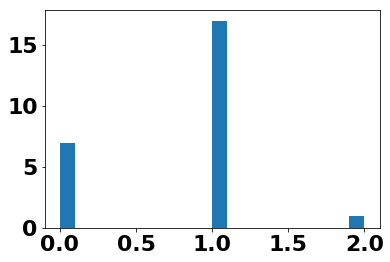

In [190]:
plt.hist(model.predict(X).tolist(),bins=20)

In [191]:
# Spits out human readable recipes
text_vector_recipes = [vector_to_recipe(recipe,ingredient_vector) for recipe in model.cluster_centers_]
for recipe in text_vector_recipes:
    print "Here's a new chocolate chip cookie recipe!"
    for ingredient in recipe:
        if ingredient[:2] !="no":
            print ingredient
    print ""

Here's a new chocolate chip cookie recipe!
1 and 1/2 all-purpose flour
1/4 baking powder
3/4 baking soda
1/4 butter
1  egg
1/4 egg yolk
1/4 ground cinnamon
1/4 large egg
1/4 macadamia nuts
1/2 packed brown sugar
1/2 salt
1 and 1/4 semisweet chocolate chips
1/4 sifted all-purpose flour
1/4 unsalted butter
1  vanilla extract
1/2 white sugar

Here's a new chocolate chip cookie recipe!
1 and 1/2 all-purpose flour
3/4 baking soda
1/2 butter
1 and 1/2 eggs
1/4 packed brown sugar
1/4 packed light brown sugar
1/4 quick-cooking oats
1/4 rolled oats
1/2 salt
1  semisweet chocolate chips
1  vanilla extract
1/4 water
1/4 white chocolate chips
1/2 white sugar

Here's a new chocolate chip cookie recipe!
3/4 all-purpose flour
3/4 baking powder
4  butter
1/4 confectioners' sugar
1 and 1/4 eggs
1/4 salt
1 and 1/4 semisweet chocolate chips
3/4 vanilla extract
3/4 white sugar



In [9]:
# inputs a list, normalizes it
def normalize(l):
    return [float(x)/sum(l) for x in l]

# Takes a real number, rounds to nearest 0.25
def round_to_quarter(x):
    return round(x*4)/4

# Takes a string, like 1/4, and returns 0.25
def string_to_dec(string):
    if "/" in string:
        return float(string[0])/float(string[2])
    else:
        return float(string)

# Takes a decimal number that has been round to the nearest 0.25, returns text rep 
# example: 1.25 -> 1 and 1/4
def num_to_text(x):
    if x == 0:
        return "no"
    whole = int(x)
    decimal = x%1
    frac = ""
    if whole == 0:
        if decimal == 0.25:
            frac = "1/4"
        elif decimal == 0.5:
            frac = "1/2"
        elif decimal == 0.75:
            frac = "3/4"
        else:
            frac = ""
        return frac
    else:
        if decimal == 0.25:
            frac = "and 1/4"
        elif decimal == 0.5:
            frac = "and 1/2"
        elif decimal == 0.75:
            frac = "and 3/4"
        else:
            frac = ""
        return str(whole) + " "+ frac
    
# Takes a normalized vector and returns a text representation of it
# take the egg and set it to 1
def vector_to_recipe(vector,ingredient_vector):
    #flour_index = ingredient_vector.index("eggs")
   # print "egg index: ", egg_index
    num_servings = 10
    #egg_scale = num_servings/vector[egg_index]
    vector = [round_to_quarter(x * num_servings) for x in vector]
    text_vector = []
    for i in range(len(vector)):
        text_vector.append(num_to_text(vector[i]) + " " + str(ingredient_vector[i]))
    return text_vector
    


# Hierarchical Clustering

In [24]:
X=np.array(measurement_vectors)

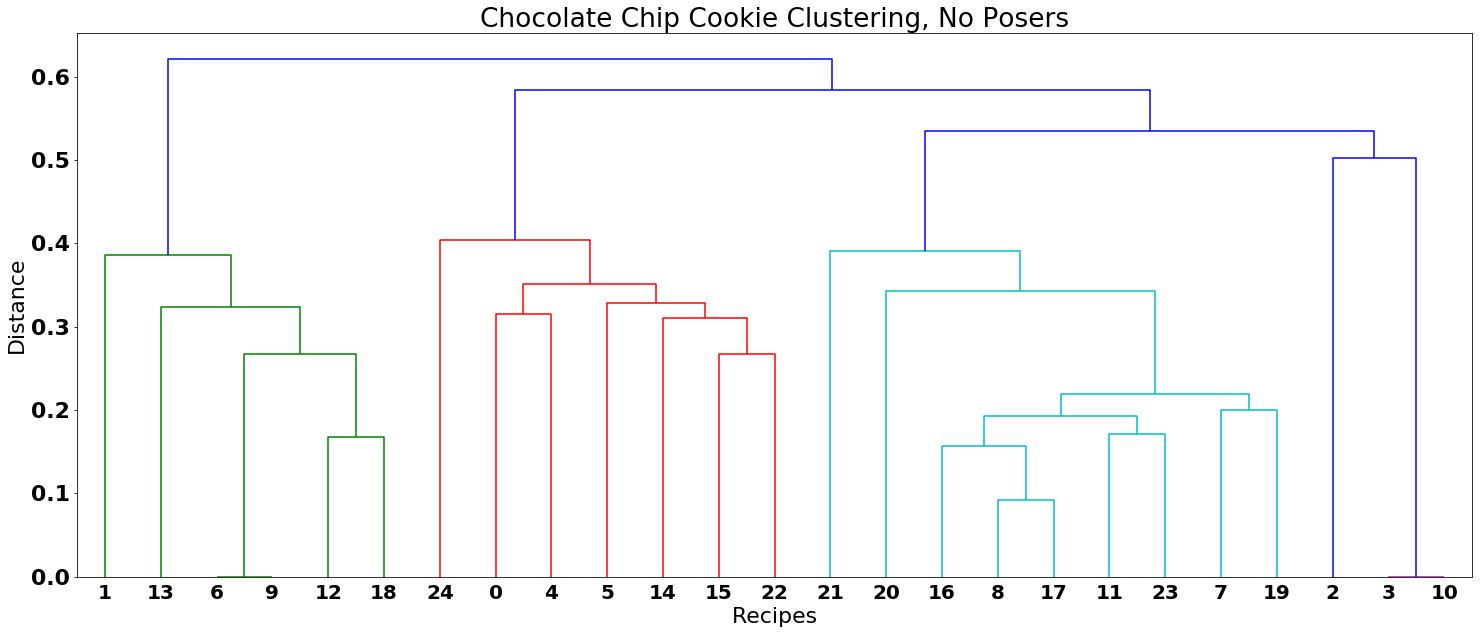

In [194]:
# generate the linkage matrix
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
Z = linkage(X, 'ward') # "ward" is the distance metric, we can change this if needed
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Chocolate Chip Cookie Clustering, No Posers')
plt.xlabel('Recipes')
plt.ylabel('Distance')
dendrogram(
    Z,
#     truncate_mode='lastp',
#     p=20,
    no_labels = False,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=20.,  # font size for the x axis labels
)

#plt.show()
plt.savefig("ChocolateChipCookieClustering-noPosers.png",dpi=500)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.28571429,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07142857,  0.        ,  0.        ,  0.        ,
        0.        ,  0.42857143,  0.14285714,  0.        ,  0.        ,
        0.        ,  0.07142857])

In [168]:
# Spits out human readable recipes
recipe = vector_to_recipe(X[0],ingredient_vector)
for ingredient in recipe:
    if ingredient[:2] !="no":
        print ingredient
print ""

1  all-purpose flour
1/2 baking powder
1/2 baking soda
1/2 butter
1/2 chopped walnuts
1  eggs
2  milk chocolate
1/2 packed brown sugar
1  rolled oats
1/4 salt
1  semisweet chocolate chips
1/2 vanilla extract
1/2 white sugar



In [183]:
# Spits out human readable recipes
recipe = vector_to_recipe(X[1],ingredient_vector)
for ingredient in recipe:
    if ingredient[:2] !="no":
        print ingredient
print ""

1 and 3/4 all-purpose flour
3/4 baking soda
1 and 3/4 large egg
1/2 milk chocolate chips
1/2 packed light brown sugar
3/4 salt
1/2 semi-sweet chocolate chips
3/4 unsalted butter
3/4 vanilla extract
1/2 white chocolate chips
3/4 white sugar



In [165]:
for x in list(X[0]):
    if x !=0:
        print x,","

0.102564102564 ,
0.0512820512821 ,
0.0512820512821 ,
0.0512820512821 ,
0.0512820512821 ,
0.102564102564 ,
0.205128205128 ,
0.0512820512821 ,
0.102564102564 ,
0.025641025641 ,
0.102564102564 ,
0.0512820512821 ,
0.0512820512821 ,


In [ ]:
[0.10256410256410256, 0.05128205128205128, 0.05128205128205128,
 0.0,
 0.05128205128205128,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05128205128205128,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10256410256410256,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20512820512820512,
 0.0,
 0.05128205128205128,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10256410256410256,
 0.02564102564102564,
 0.0,
 0.10256410256410256,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05128205128205128,
 0.0,
 0.0,
 0.0,
 0.05128205128205128]